# AirPassengers Time Series project (SARIMA version)

#### Autor. Luis Vargas

In [383]:
library(MASS)
library(forecast)
library(tseries)
library(zoo)

## Un poco de historia.
### El data set de AirPassengers es un clásico en los set de datos recopilados y disponibles al público por distintas aerolineas internacionales para la aplicación de métodos como Box & Jenkins, i.e. el análisis de series de tiempo, la metodología de Box-Jenkins, nombrada así en honor a los estadísticos George E. P. Box y Gwilym Jenkins, se aplica a los modelos autorregresivos de media móvil ARMA o a los modelos autorregresivos integrados de media móvil (ARIMA) con componente Estacional para encontrar el mejor ajuste de una serie temporal de valores, a fin de que los pronósticos sean más acertados. Es un data set que contiene el total de pasajeros habidos en aerolíneas internacionales mensualmente desde el año 1949 hasta 1960. Nuestra intención con este projecto, es lograr pronosticar adecuadamente la cantidad de pasajeros que habrá en los próximos dos años, i.e. 1961 y 1962, para lograr así disponibilizar este modelo a todo aquel que desee ajustar el modelo a datos más reales.

In [2]:
data(AirPassengers)

In [382]:
x <- AirPassengers

### Creamos el objeto matemático "ts" (Time Series), este objeto posee la estructura de una tabla con particiones de meses (como columnas) e índices (como renglones)

In [381]:
xt <- ts(AirPassengers, frequency = 12)

### Este grafico de cajas me gusta crearlo, pues nos puede dar mucha información de entrada. Si observamos con cuidado, podemos ver que el gráfico sugiere la existencia de estacionalidad entre los meses de Junio a Septiembre, esto debemos tenerlo en cuenta al momento de continuar con el tratamiento de datos.

### Por el momento, ya sabemos que la estacionalidad (oscilaciones repetitivas en ciertos periodos) debemos tratarla como un modelo SARIMA, i.e. con el componente S.

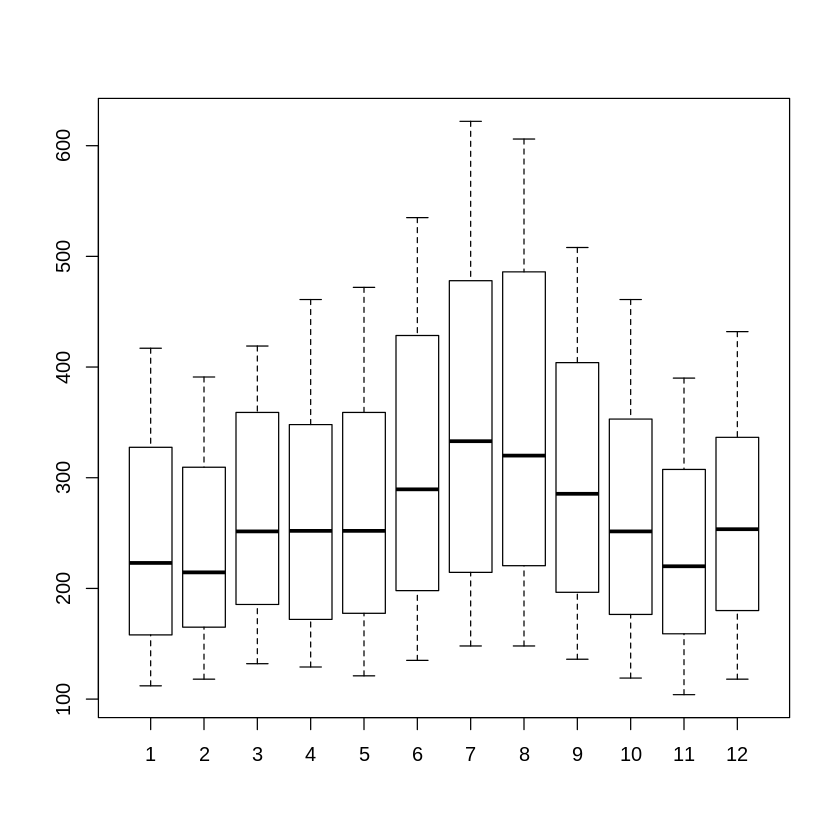

In [185]:
boxplot(xt ~ cycle(xt))

### Es siempre una buena práctica, cada que obtenemos un set de datos a analizar como serie temporal, graficar los datos que la conforman, y de ser posible, tenemos que observar la descomposición natural de una serie de tiempo. 

### Esto parte del concepto de que toda serie de observaciones en el tiempo posee distintos componentes, los cuales son:
- Tendencia
- Estacionalidad
- Aleatoriedad

### En eso se basa cualquier análisis de series de tiempo, en descomponer la serie para poder obtener predicciones más certeras y confiables.

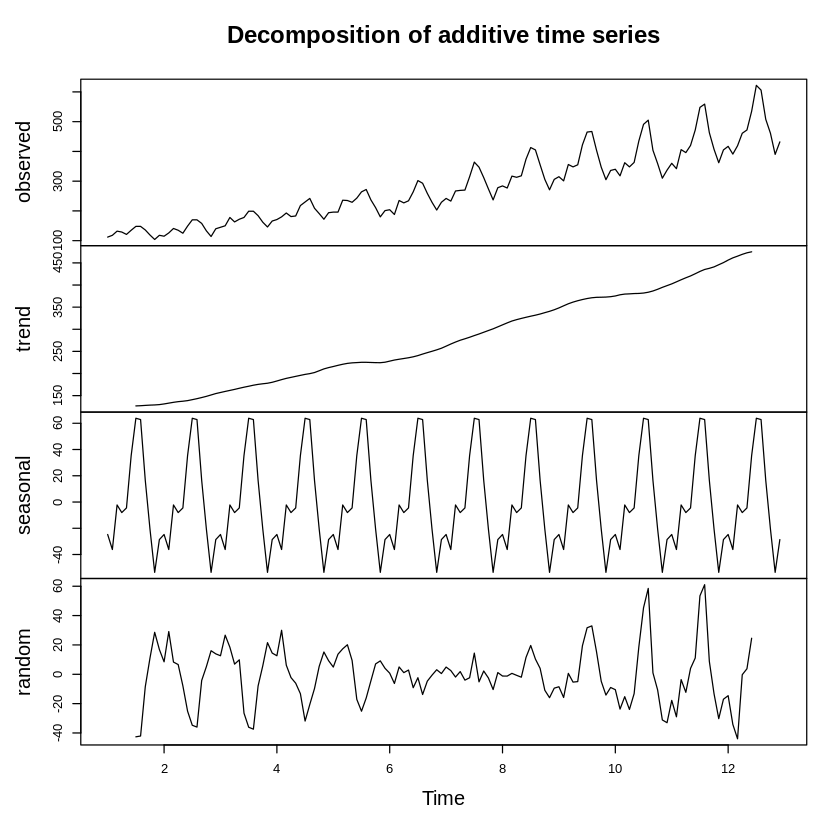

In [182]:
plot(decompose(xt))

### Ahora bien, la serie de tiempo presenta tendencia, una de las razones por las que debemos percatarnos de ello es que para encontrar el máximo orden de nuestros parámetros, este deberá permanecer sin el efecto exponencial y/o lineal de la tendencia, además de homogenizar la varianza, a una varianza constante.

### Para obtener el primer efecto y sacarlo fuera de nuestra serie, podemos aplicar una diferencia de 1er grado, causando así, el efecto de centrar a 0 la serie.

### Una vez centrada la serie, podemos pensar en homogenizar la varianza, esto lo podemos lograr por medio de distintas transformaciones, una de ellas, la más usada, es palicando la máxima log-verosimilitud que pueda ajustar nuestros datos, homogenizando así, la vaianza cambiante, a una constante.

### A manera de ejemplo, mostraré en los siguientes display's como se ve una serie sin tendencia y con varianza constante. Así mismo podremos apreciar el gráfico de Autocorrelaciones Cruzadas y Parciales, para observar el efecto que causa dichos tratamientos en la correlación de las observaciones.

In [402]:
diffXt <- diff(xt)
diffLogXt <- diff(log(xt))

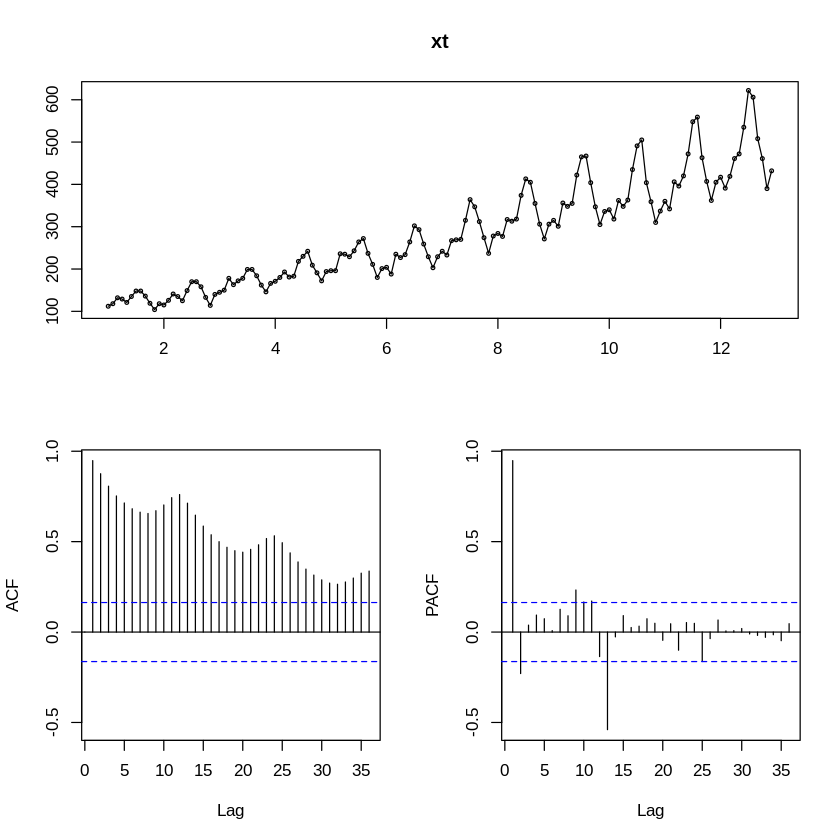

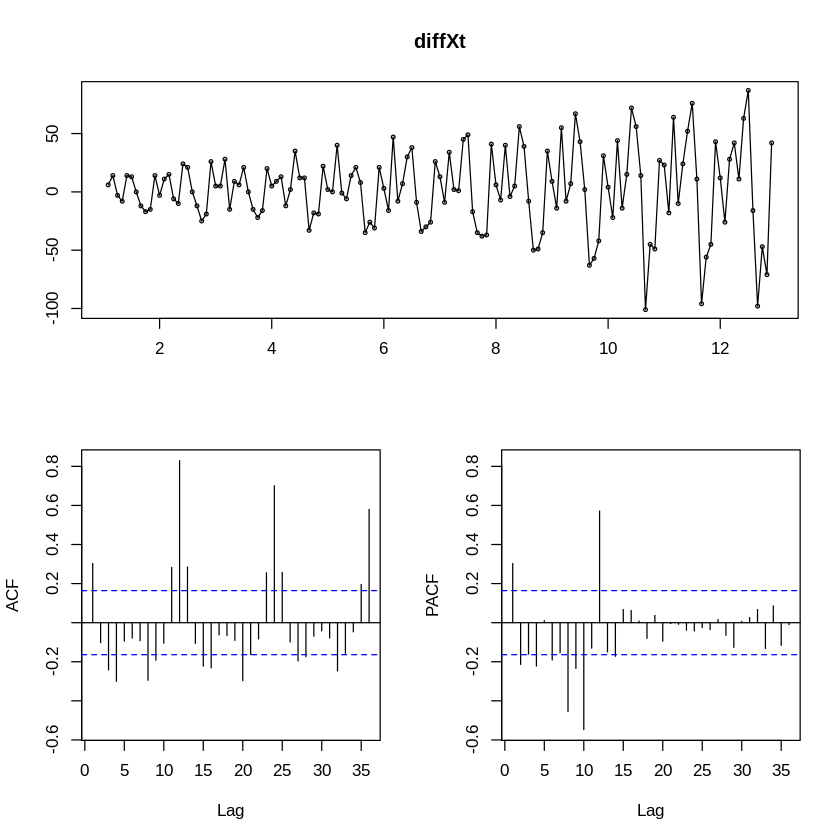

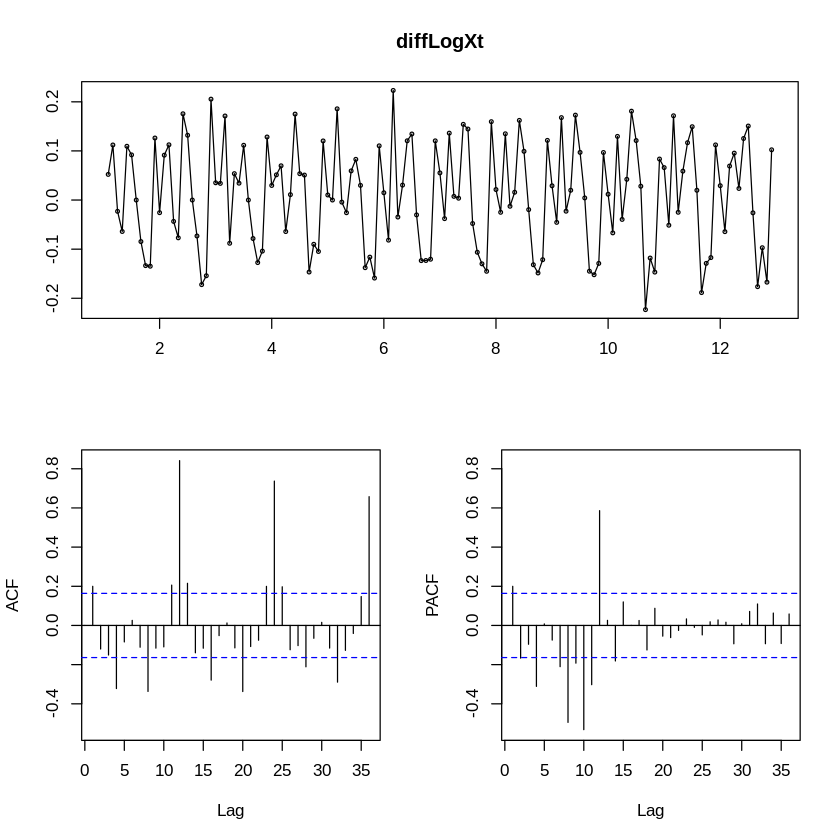

In [404]:
par(mfrow = c(2,1))
tsdisplay(xt)
tsdisplay(diffXt)
tsdisplay(diffLogXt)

### Podemos decir que aún a la serie, debemos realizare un par de tratamientos adicionales, pues el gráfico _ACF_ del display _xt_ presenta estacionalidad, esto se debe a los comportamientos oscilatorios que poseen las barras, todas ellas completamente fuera de las bandas, se debe suavizar para lograr encontrar el máximo orden de $q$.

### Sin embargo, el gráfico _PACF_ del display _xt_ nos dice que periodo de estacionalidad presentan los datos, por lo visto en el gráfico de _PACF (Partial Autocorrelation Function)_. 

### Entonces podría esperar una estacionalidad de cada 12 meses, debido a los incrementos en consumos económicos generales.

### Por lo tanto, podríamos decir que el máximo órden del primero de los parámetros,i.e. el parámetro $p = 12$:  
<h1><center>$SARIMA(p, d, q)(P, D, Q) [S]$</center></h1>

### Dentro del gráfico _ACF_ de _Diff(xt)_ se puede apreciar que la Autocorrelación de $q$ sigue teniendo estacionalidad, por lo que podemos aplicarle logaritmo a la diferencia a los datos.

### Podemos decir que el máximo orden de $q$ y $Q$ es de 4, esto se determina así puesto que las correlaciones, a pesar de tener repeticiones cada 12 meses, podemos de igual forma observar las mismas repetciones a niveles más granulares, si observamos con cuidado en el gráfico de _ACF_ de _log(Diff(xt))_ podemos observar dichas repeticiones cada 4 meses, por lo que podemos optar por escoger ese máximo órden de nuestros parámetros $q$ y $Q$. Adicionalmente, esto hará que nuestros niveles de Criterio de Información de Akaike (AIC) resulten ser los más bajos posibles y nuestra log-verosimilitud sea la más alta posible.

### Se pueden apreciar cilcos de 4 meses con correlaciones significativas en _ACF_. Mientras que la correlación siginificativa se presenta con ciclos de 12 meses en _PACF_

### Podmeos concluir que el máximo orden de $q$ es cada 4 meses, i.e. podemos decir, por lo tanto, que el orden máximo de $Q = 4$.

### Ahora bien, se establece el máximo orden de $q$ y $Q$ cada 4 meses dado el patrón observado, dicho patrón se comporta de formas similares cada 4 meses de rezago, y bueno, por si esto fuese poco, podemos interpretar lo siguiente, al analizar los datos de pasajeros de vuelos durante estos 12 años de historia, se produce un efecto estacional por cada trimestre, dadas las condiciones de actividades regulares de la población, podemos decir que existen periodos de escuela y vacación, los cuales precisamente siguen un patrón trimestral estacional, con esto no quiero decir que toda la gente salga de viaje cada trimestre, más bien, por el mismo efecto que observamos al inicio con el gráfico de barras, entre los meses de Junio a Septiembre, la gente que planifica sus viajes para dichas fechas, dado que muchos de ellos tienen hijos en la escuela, durante esos periodos los chicos salen de vacaciones de verano, este efecto por consiguiente se vuelve completamente cíclico para ese nicho de personas, produciendo un efecto aparentemente trimestral, dado que las personas (muy probablemente con hijos) que viajan en ciertos periodos, producen que el resto de las personas que no poseen hijos ni un calendario específico, viajen en trimestres donde no hay vacaciones por parte de escuelas.

### Se construye, por lo tanto, el primer modelo, con miras a tenerlo como comparación.

In [403]:
(model_compare = auto.arima(diffLogXt, stepwise = TRUE))

Series: diffLogXt 
ARIMA(0,0,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 estimated as 0.001369:  log likelihood=244.7
AIC=-483.39   AICc=-483.2   BIC=-474.77

> NOTA: Con el modelo anterior, podemos observar que al ingresar los datos logaritmizados con diferencia de 1 grado obtenermos niveles interesantes de AIC y log-verosimilitud. 
Nuestro criterio de Información de Akaike muestra un nivel de penalización de -483.39 vs un nivel de log-verosimilitud de 244.7, como aún no tenemos contra qué comparar éste modelo, no podemos decir que los niveles son los más óptimos para nuestro modelo. Por lo que se procede a construir un modelo con parámetros estimados (p,d,q)(P,D,Q)[S].

### Con esta transformación, homogenizamos la varianza no constante, dicha transformación la conocemos como la box y cox. La familia de transformaciones más utilizada para resolver los problemas de falta de normalidad y de heterocedasticidad es la familia de Box-Cox, cuya definición es la siguiente.

### Se desea transformar la variable Y, cuyos valores muestrales se suponen positivos, en caso contrario se suma una cantidad fija M tal que Y + M > 0. La transformación de Box-Cox depende de un parámetro c por determinar y viene dada por.

![title](Datos/indice248x.gif)

### Esto quiere decir que cuando nuestra lambda está dentro de un intervalo donde se encuentre el 0 debemos aplicar la transfarmación directa de $log(x)$. Por otro lado, si nuestra lambda se encuentra dentro de un intervalo donde se encuentre el 1, no será necesario aplicar ninguna transformación.

### Cabe mencionar, que la mejor lambda encontrada para transformar nuestros datos está ubicada dentro de cierto intervalo con un nivel de confianza al 95%

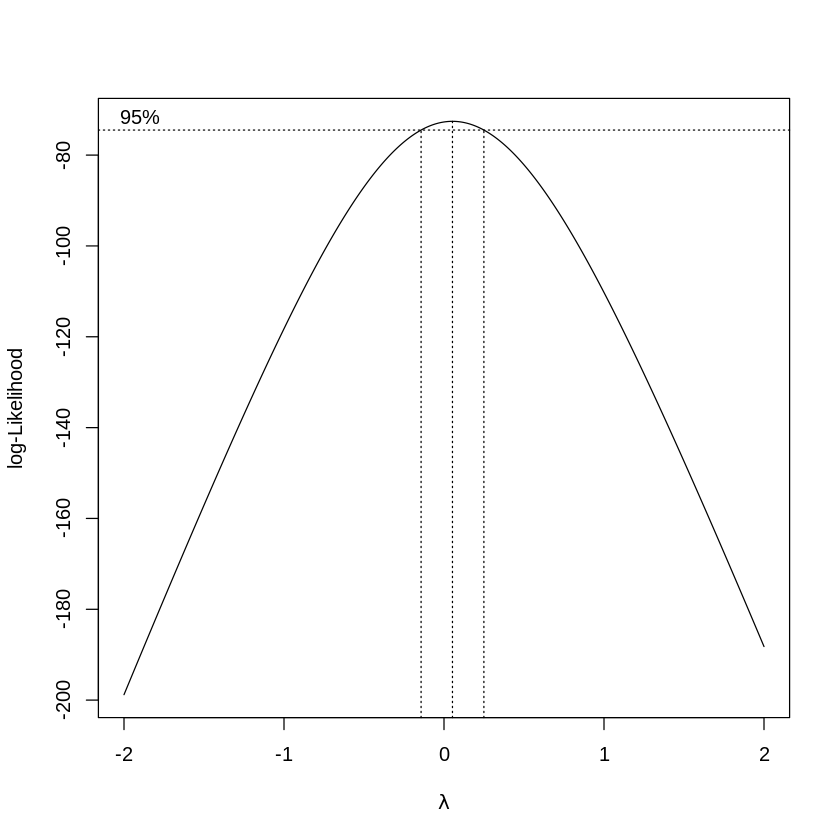

In [103]:
Box.Cox <- function(datos){
    library(MASS)
    n = length(datos)
    t = 1:n
    x = as.vector(datos)

    datos = data.frame(t,x)
    A = boxcox(x~t,data =datos,lambda = seq(-2, 2, 1/100000) )
    lambda = A$x[which.max(A$y)]
    lambda
}

In [401]:
y = (x^lambda - 1) / lambda
y = ts(y, frequency = 12)

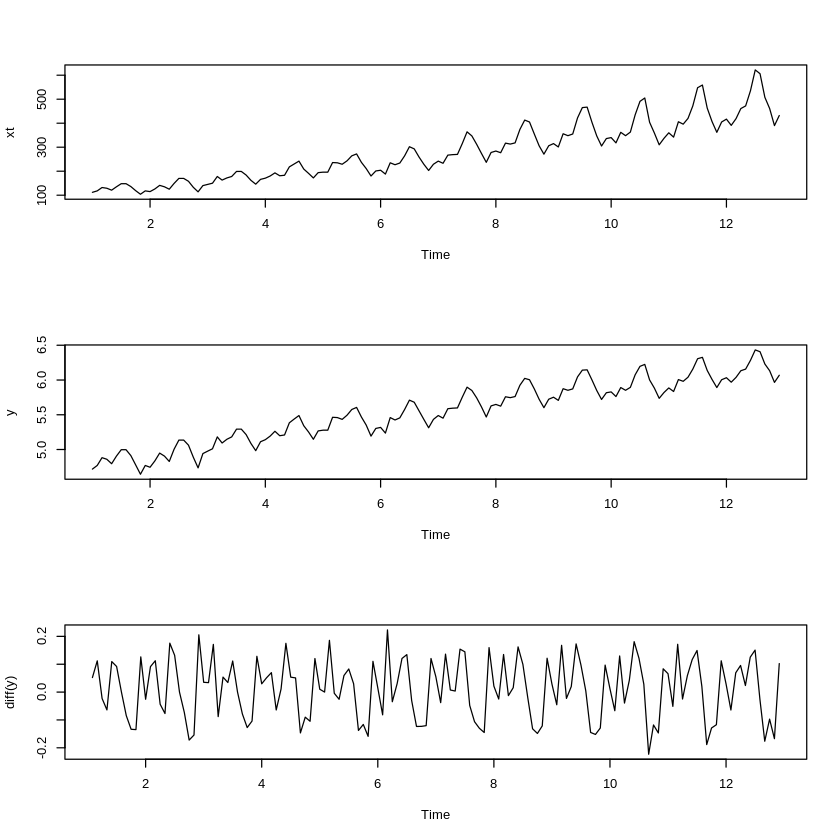

In [395]:
par(mfrow = c(3,1))
plot(xt)
plot(y)
plot(diff(y))

### Ahora construiremos nuestro modelo SARIMA con parámetros estimados, resultado del análisis previo, podemos decir que el máximo órden de:
- p = 12
- d = 1
- q = 4
- P = 12
- D = 1
- Q = 4

### A su vez, he decidido aprovechar el parámetro disponible de stepwise, dicho parámetro nos ayudará a encontrar el mejor modelo en el menor tiempo posible, después de na serie de iteraciones t trade-off's que realizará este método. Es importante mencionar que el modelo recibirá el objeto de datos log-transformados nombrados como _y_.

In [398]:
(SARIMA_I = auto.arima(y,stepwise = TRUE, d=1, D=1, max.p=12, max.q=4,
                       max.P=12, max.Q=4, max.order=10, max.d=2, max.D=2,
                       start.p=0, start.q=0, start.P=0, start.Q=0,trace=FALSE))

Series: y 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.3943  -0.5386
s.e.   0.0897   0.0736

sigma^2 estimated as 0.002465:  log likelihood=206.42
AIC=-406.84   AICc=-406.65   BIC=-398.22

> Dado el anterior modelo construido para comparar resultados, vemos que en este nuevo modelo con parámetros seleccionados, nuestro criterio de información de Akaike resultó en una penalización mucho menor que el anterior, sin embargo, nuestro log-verosimilitud es menor que el anterior con una diferencia de 38.28 puntos, esto quiere decir que nuestro primer modelo pudo tener un mejor resultado de log-verosimilitud que maximiza para determinar los valores óptimos de los coeficientes estimados, dada esa razón, es probable que exista un error en nuestros coeficientes estimados de +-38 puntos. Además, el valor de nuestra ${\displaystyle \sigma ^{2}}$ es mayor con respecto al valor del "model_compare", esto pretende explicar la variabilidad que ha cachado el modelo, explicando con mayor precisión, el fenómeno analizado en el "model_compare". Sin embargo, el primer modelo construido es un modelo con estimaciones inexactas, dado que no estamos especificando los parámetros de un modelo ARIMA con estacionalidad. 

### Ahora validaremos los supustos que deben cumplir nuestros residuales, producidos por nuestro modelo, estos supuestos son:
- No correlación de los errores, i.e. ninguna barra deberá rebasar las bandas punteadas azules
- Prueba de normalidad de Shapiro-Wilk para validar normalidad en los errores. La prueba ha sido aprobada, por lo tanto, no existe evidencia suficiente para rechazar $H_0$
- Probamos supuesto de media igual a cero, dicha prueba fue aprobada, por lo tanto no existe evidencia suficiente para rechazar $H_0$

In [144]:
residuales_I = as.numeric(residuals(SARIMA_I))

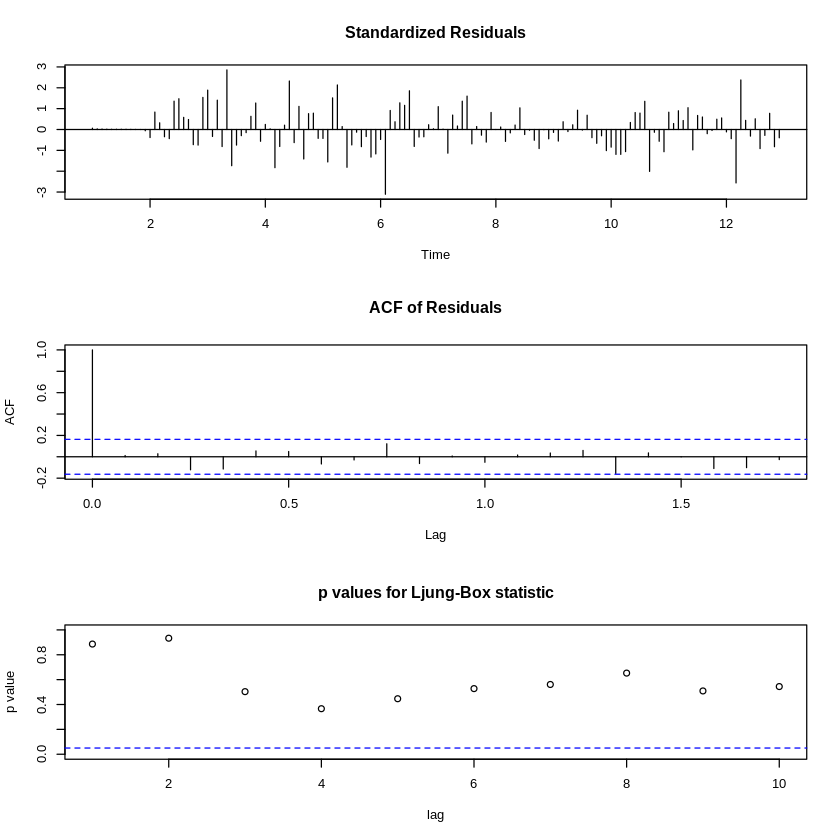

In [146]:
tsdiag(SARIMA_I)

In [159]:
shapiro.test(sample(residuales_I))


	Shapiro-Wilk normality test

data:  sample(residuales_I)
W = 0.98688, p-value = 0.1902


In [160]:
t.test(residuales_I)


	One Sample t-test

data:  residuales_I
t = 0.24005, df = 143, p-value = 0.8106
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.006823525  0.008709912
sample estimates:
   mean of x 
0.0009431936 


### Después de validar el cumplimiento de los supuestos en la distribución de los errores, podemos construir nuestro polinomio de retraso con los coeficientes dados por el modelo.

<h1><center>AR: $(1-B^{12})(1-B)$ = $1-B-B^{12}+B^{13}$</center></h1>
<h1><center>MA: $(1-0.3943*B^{1})(1-0.5386*B^{12})$ = $1-0.3943*B-0.5386*B^{12}+0.21237*B^{13}$</center></h1>

In [231]:
Y = as.numeric(y)
W = as.numeric(residuals(SARIMA_I))
n = length(Y)

### Generamos una simulación de nuestras predicciones para obtener nuestros intervalos de confianza al momento de generar el forecast, esto recibe por ende el modelo ya transformado, y por dentro el polinomio de retraso construido con los coeficientes dados por el mismo modelo.

In [233]:
GenSim <- function(x,W,T){
    i = length(x)+1
    for(j in 1:T)
    {
        W[i] = rnorm(1,0,sd=sqrt(0.002465)) 
        x[i] = x[i-1]+x[i-12]-x[i-13]+W[i]-0.3943*W[i-1]-0.5386*W[i-12]+0.21237*W[i-13]
        i = i+1
    }
    x
}

In [366]:
simulation <- GenSim(Y,W,24)

### Ahora bien, para generar una proyección en los datos, he decidido tomar los mismo datos generados por la simulación y añadirlos al objeto ts, esto hará que añada dos años más de predicciones a lo largo de los meses. Esto nos ayudará a ganerar la gráfica con la proyección y generar sus respectivos intervalos de confianza.

In [409]:
tsSimulation <- ts(simulation, frequency = 12)

### Así mismo debemos recordar siempre de regresar los datos a su estado original, para poder trabajar la proyección de manera efectiva. Esto se hace con el reverso de la función lambda aplicada

In [425]:
reverseTrans = (lambda*tsSimulation+1)^(1/lambda)

### Una vez teniendo los datos en su estado original, procederemos a graficarlos, para fines ilustrativos mostraré dos gráficos, uno sin la predicción, i.e. la serie original sin transformaciones, y otro con la predicción sin ilustrar (para efectos de pruebas de Touring).

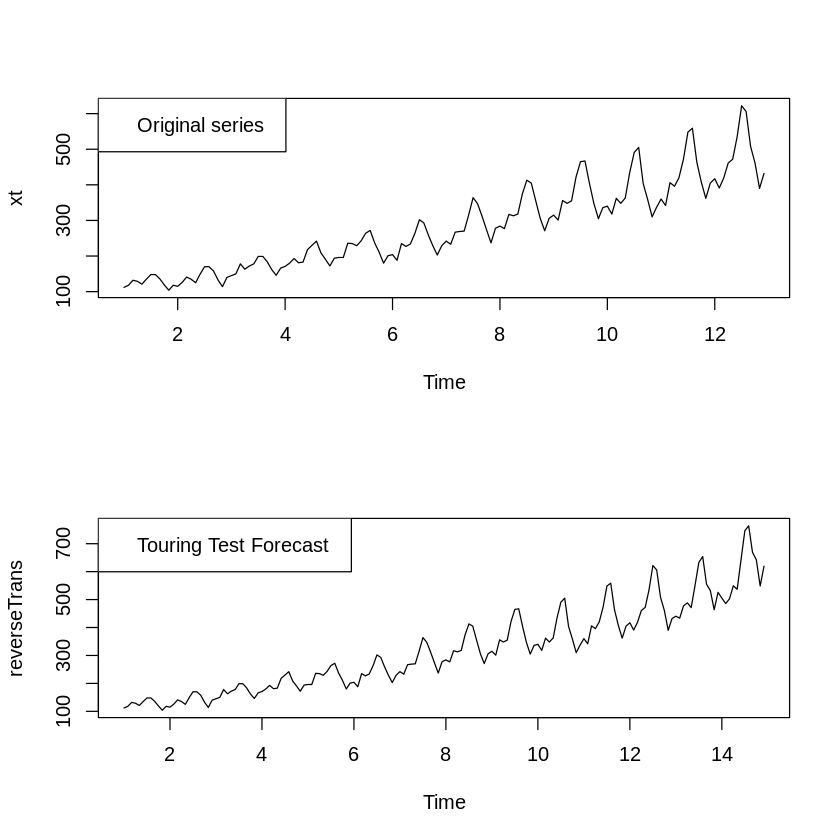

In [372]:
par(mfrow = c(2,1))
plot(xt)
legend("topleft", c("Original series"))
plot(reverseTrans)
legend("topleft", c("Touring Test Forecast"))

### Realicé nuevamente un modelo versión arima, esto es únciamente para obtener el máximo y el mínimo de mis errores estándar y poder así calcular nuestras bandas de confianza al momento de realizar el pronóstico sobre la serie. Este me ocupé de que siguiere el orden original de nuestro modelo SARIMA(p,d,q)(P,D,Q) este orden es de suma importancia, dado ello podemos calcular de forma correcta nuestros errores estándar. Ahora bien, notarás que el modelo está construido con los datos de "reverseTrans" esto quiere decir que el cálculo de los intervalos de confianza se realiza sobre el set de datos originiales, sin transfromaciones, esto parte de la idea de lograr tener la capacidad de realizar un pronóstico sobre los datos reales, más no sobre los datos transfromados y tratados. Cabe mencionar que los datos "reverseTrans" ya vienen revertidos sin la log-transformación y con las predicciones de 2 años.

In [420]:
(fitT <- arima(reverseTrans, order=c(0, 1, 1), list(order=c(0, 1, 1), period = 12)))


Call:
arima(x = reverseTrans, order = c(0, 1, 1), seasonal = list(order = c(0, 1, 
    1), period = 12))

Coefficients:
          ma1     sma1
      -0.2071  -0.1989
s.e.   0.0792   0.0692

sigma^2 estimated as 174.7:  log likelihood = -620.36,  aic = 1246.71

In [421]:
forecastingT <- predict(fitT, n.ahead = 24)

In [422]:
Upper_T <- forecastingT$pred + 2*forecastingT$se
Lower_T <- forecastingT$pred - 2*forecastingT$se

### Por último, pero no menos importante, dado que es la parte de mayor relevancia de todo nuestro trabajo, muestro finalmente el gráfico de la serie de datos de AirPassengers con la predicción a dos años, adicionando sus bandas de error con un nivel de confianza al 95% 

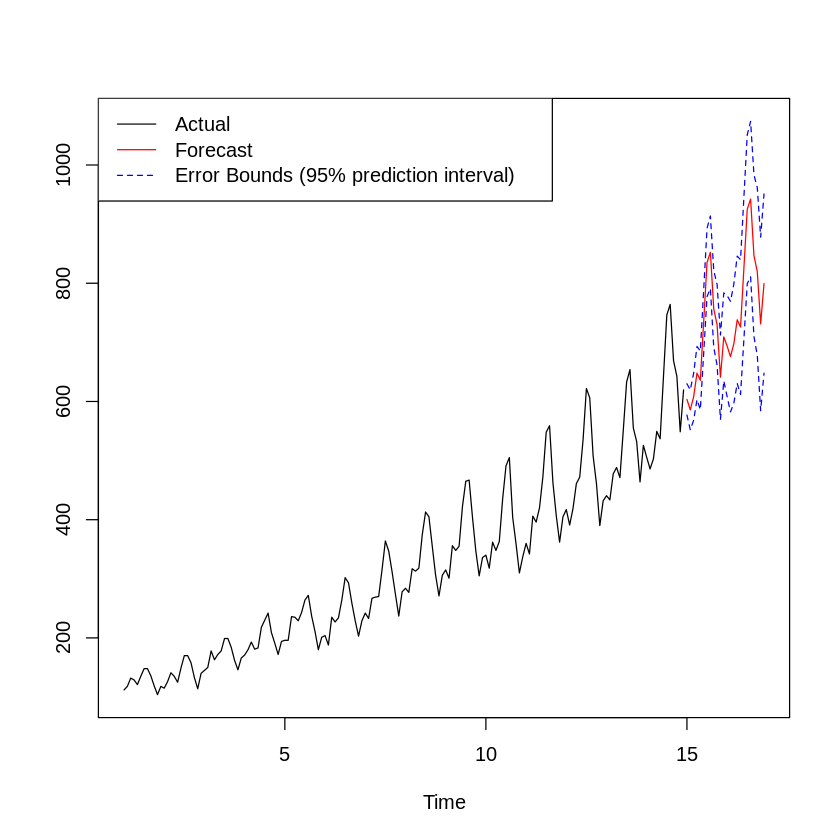

In [428]:
ts.plot(reverseTrans, forecastingT$pred, Upper_T, Lower_T, col=c(1, 2, 4, 4), lty=c(1, 1, 2, 2))
legend("topleft", c("Actual", "Forecast", "Error Bounds (95% prediction interval)"), 
       col=c(1, 2, 4),lty=c(1, 1, 2))